In [21]:
import pandas as pd
import numpy as np

summary6 = open("summary6.csv", "r")

rem_text = summary6.read()
text_split = rem_text.split('\n')
rem_data = np.array(text_split[0].split(','))

bad_list = ['P008']
for i in range(1, len(text_split)-1):
    line = text_split[i].split(',')
    if line[1] not in bad_list:
        rem_data = np.vstack((rem_data, line))
        
pd.set_option('display.max_columns', None)
df = pd.DataFrame(rem_data[1:], columns=rem_data[0])
df

,name,id,o_rem_num,x_rem_num,o_rem_duration,x_rem_duration,o_rem_avg,x_rem_avg,o_rem_frag,x_rem_frag,o_rem_density,x_rem_density,o_am_vas,x_am_vas,o_pm_vas,x_pm_vas,o_am_cortisol,x_am_cortisol,o_pm_cortisol,x_pm_cortisol,note,age,exp,o_ahi,o_ai,o_hi,x_ahi,x_ai,x_hi,o_start,x_start,o_rem_latency,x_rem_latency
0,陳碧蓮,P001,9,6,4620,2460,513,410,6.4372,6.1911,17.749,36.22,.,.,.,.,10.8,5.9,5.7,3.4,.,60,19,19.2,4.4,14.8,22.1,5.9,16.2,21:27:15,21:27:15,4950,12990
1,陳佳星,P002,7,8,4740,3990,677,499,0.6371,2.9749,21.287,12.857,5,5,3,4,6.4,9.3,4.1,7.9,x_fs=200訊號有干擾,35,0.6,2.2,0.2,2.1,3.6,0.3,3.3,22:30:58,22:29:10,8550,3720
2,袁賽芳,P003,6,5,3990,5700,655,1140,7.0125,6.8386,20.401,11.509,3,2,5,3,7.7,9.3,4.7,5.8,o_fs=200訊號有干擾,54,10,39.7,9.7,30,36.7,7,29.7,22:43:54,22:17:49,6420,6600
3,鄭雅菁,P004,9,8,4230,5190,470,649,5.2128,7.3565,32.648,32.486,3,2,4,2,8,5.7,6.3,5.1,x_fs=200,45,9,4.1,0,4.1,7.6,0,7.6,22:03:16,21:40:28,6330,8670
4,謝秀珍,P005,8,7,6780,6510,848,930,3.4794,3.596,12.006,18.095,.,.,.,.,8.6,5.9,4,4.2,.,54,6,3.8,0,3.8,3.9,0,3.9,22:15:43,21:06:21,3270,10320
5,黃淑惠,P006,7,8,4770,4860,681,608,7.0629,4.4959,7.4423,26.687,4,3,3,3,9.6,8.5,6.1,7.1,o_fs=200,54,13,24.7,4.1,20.5,25.2,0.6,24.6,23:00:14,22:33:19,4650,3150
6,陳淑美,P007,3,5,1920,1950,640,390,1.4323,3.5026,15.573,46.718,3,2,4,2,12.4,13.4,8.1,7.6,o_fs=200; eeg有干擾,48,6,0.9,0,0.9,1.7,0,1.7,22:45:03,20:44:25,15540,19440
7,郭秉羱,P009,6,7,3360,3900,560,557,0.9077,0.741,9.6131,11.692,3,2,4,7,10.1,11.4,7.4,7.2,.,19,0.4,2.5,0.8,1.7,1.8,0.6,1.2,22:45:29,22:34:36,8880,5820
8,張柏瑞,P010,7,7,2700,3930,386,561,9.5444,6.1959,32.148,19.211,.,.,.,.,11.3,7.1,5.3,4.6,o訊號怪怪的; x_fs=200,26,2.5,14,0.2,13.8,11.6,0.7,10.9,23:12:18,23:04:37,4500,4200
9,莊惠雅,P011,13,11,3210,3030,247,275,13.5,4.2541,45.078,31.98,7,5,5,5,7.6,5.1,4.6,3.6,x_fs=200,43,20,29.2,0,29.2,31.8,0.7,31.1,22:49:00,22:57:05,4830,4170


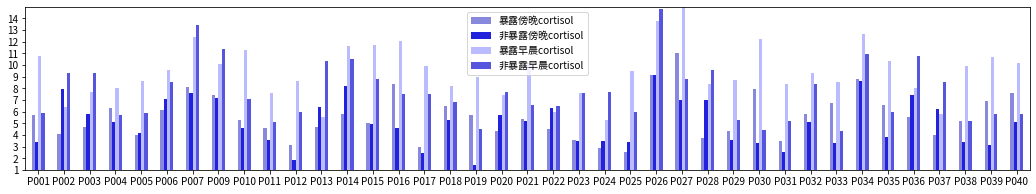

In [131]:
ids = np.array(df['id'])
o_am_cortisol = np.array(df['o_am_cortisol'], dtype=np.single)
x_am_cortisol = np.array(df['x_am_cortisol'], dtype=np.single)
o_pm_cortisol = np.array(df['o_pm_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_pm_cortisol'], dtype=np.single)


plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
rem_num = pd.DataFrame({'暴露傍晚cortisol': o_pm_cortisol, '非暴露傍晚cortisol': x_pm_cortisol, '暴露早晨cortisol': o_am_cortisol, '非暴露早晨cortisol': x_am_cortisol}, index = ids)

ax = rem_num.plot.bar(rot=0, figsize=(18,3), color={"#5555dd", "#8888dd", "#2222dd", "#bbbbff"}, yticks=np.arange(1, 15, 1), ylim=(1,15))

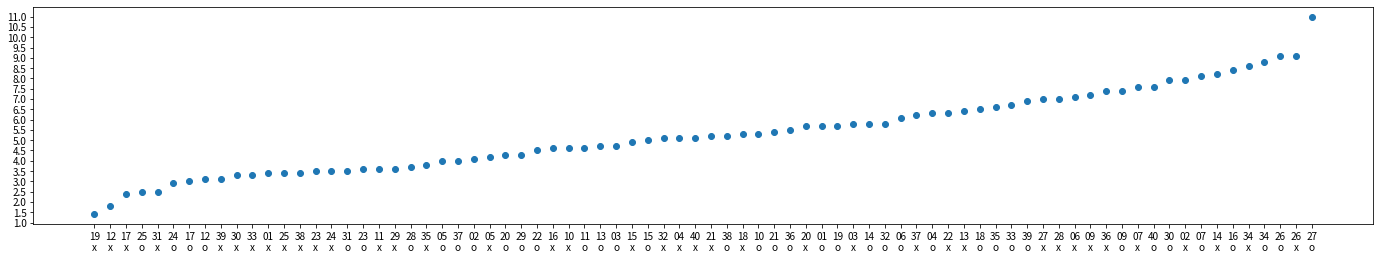

In [160]:
ids = np.array(df['id'].str.slice(start=2))
ids1 = ids + "\no"
ids2 = ids + "\nx"
ids = np.hstack((ids1, ids2))

o_pm_cortisol = np.array(df['o_pm_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_pm_cortisol'], dtype=np.single)
pm_cortisol = np.hstack((o_pm_cortisol, x_pm_cortisol))

d = {"ids": ids, "pm_cortisol": pm_cortisol}
df2 = pd.DataFrame(data=d)
df2 = df2.sort_values('pm_cortisol')

x = np.array(df2['ids'])
y = np.array(df2['pm_cortisol'])

plt.figure(figsize=(24,4))
plt.yticks(np.arange(1, 12, 0.5))  
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x=x, y=y)


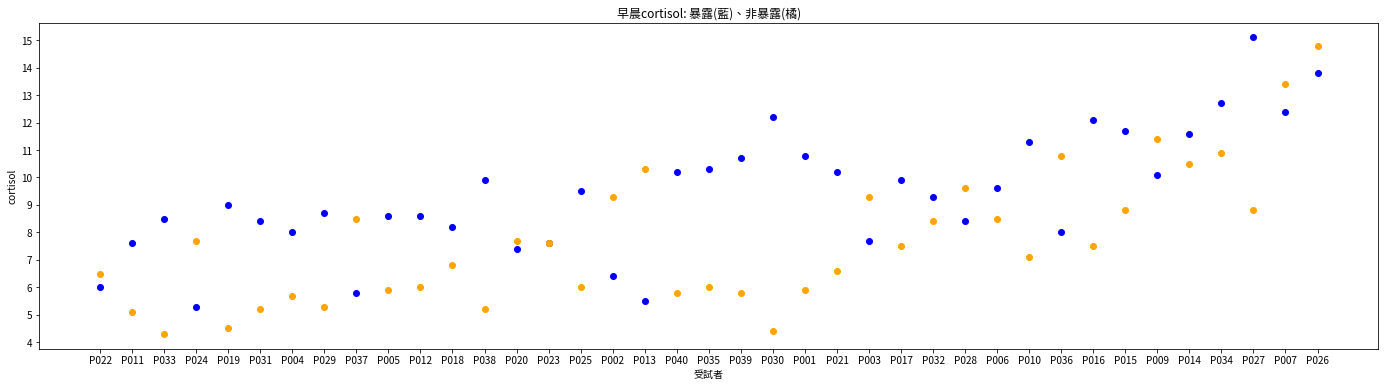

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'o_am_cortisol', 'x_am_cortisol']]
data = data.astype({'o_am_cortisol': 'single', 'x_am_cortisol': 'single'})
data['sum'] = data['o_am_cortisol'] + data['x_am_cortisol']
data = data.sort_values('sum')

x = np.array(data['id'])
y1 = np.array(data['o_am_cortisol'])
y2 = np.array(data['x_am_cortisol'])

plt.figure(figsize=(24,6))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y1, c='blue')
plt.scatter(x, y2, c='orange')
# 正常範圍為3.7至19.4之間

plt.yticks(np.arange(4, 16, 1))  
plt.ylabel("cortisol")
plt.xlabel("受試者")
plt.title("早晨cortisol: 暴露(藍)、非暴露(橘)")
plt.show()

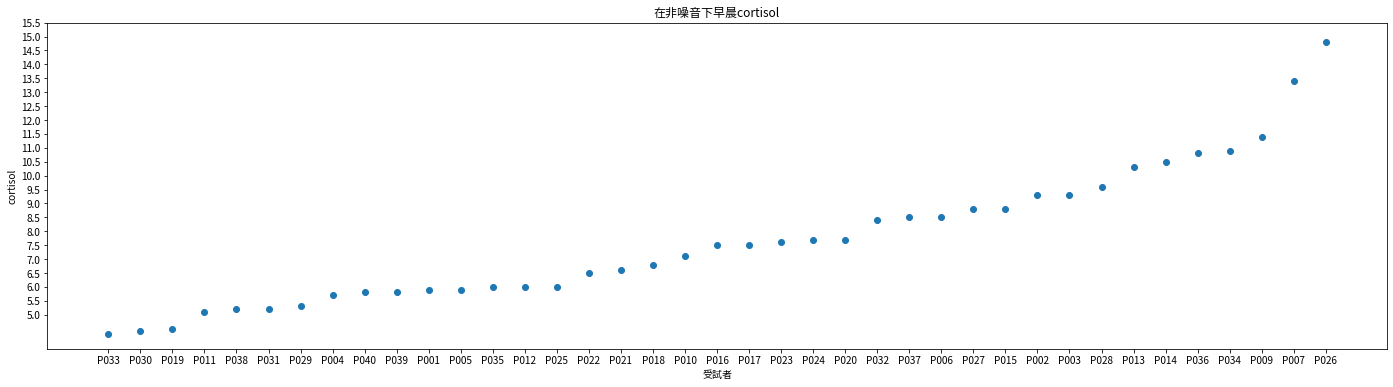

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'x_am_cortisol']]
data = data.astype({'x_am_cortisol': 'single'})
data = data.sort_values('x_am_cortisol')

x = np.array(data['id'])
y = np.array(data['x_am_cortisol'])

plt.figure(figsize=(24,6))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x,y)
# 正常範圍為3.7至19.4之間

plt.yticks(np.arange(5, 16, 0.5))  
plt.ylabel("cortisol")
plt.xlabel("受試者")
plt.title("在非噪音下早晨cortisol")
plt.show()

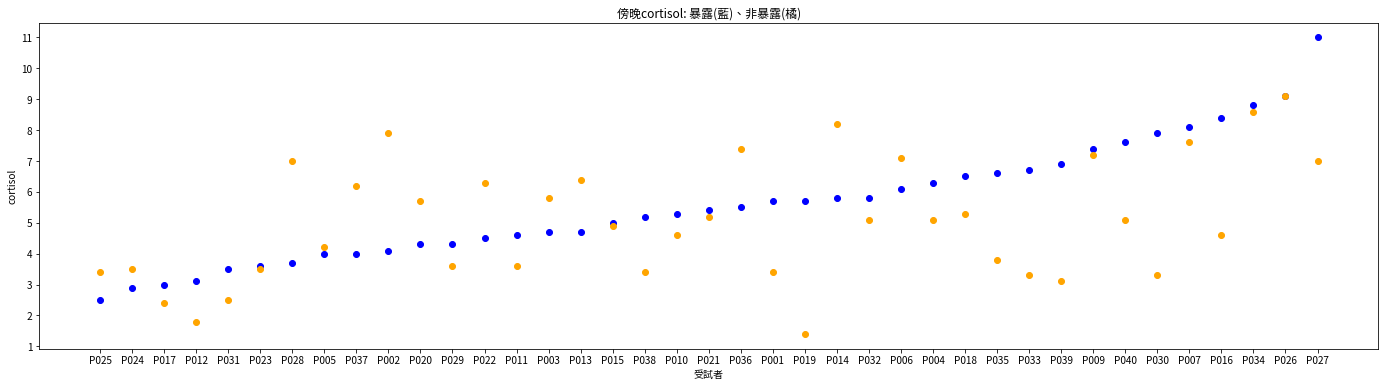

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'o_pm_cortisol', 'x_pm_cortisol']]
data = data.astype({'o_pm_cortisol': 'single', 'x_pm_cortisol': 'single'})
data = data.sort_values('o_pm_cortisol')

x = np.array(data['id'])
y1 = np.array(data['o_pm_cortisol'])
y2 = np.array(data['x_pm_cortisol'])

plt.figure(figsize=(24,6))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y1, c='blue')
plt.scatter(x, y2, c='orange')
# 正常範圍為2.9至17.3之間

plt.yticks(np.arange(1, 12, 1))  
plt.ylabel("cortisol")
plt.xlabel("受試者")
plt.title("傍晚cortisol: 暴露(藍)、非暴露(橘)")
plt.show()

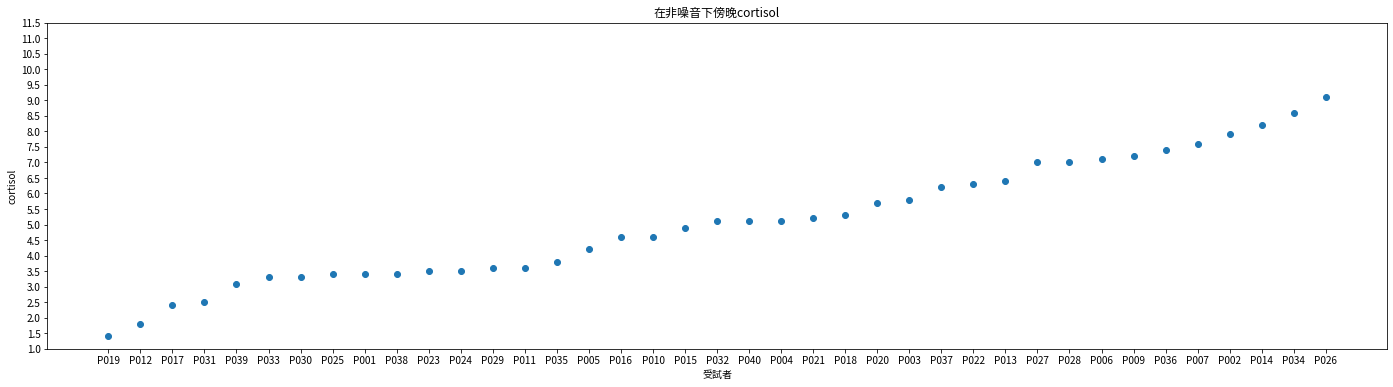

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'x_pm_cortisol']]
data = data.astype({'x_pm_cortisol': 'single'})
data = data.sort_values('x_pm_cortisol')

x = np.array(data['id'])
y = np.array(data['x_pm_cortisol'])

plt.figure(figsize=(24,6))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x,y)
# 正常範圍為2.9至17.3之間

plt.yticks(np.arange(1, 12, 0.5))  
plt.ylabel("cortisol")
plt.xlabel("受試者")
plt.title("在非噪音下傍晚cortisol")
plt.show()

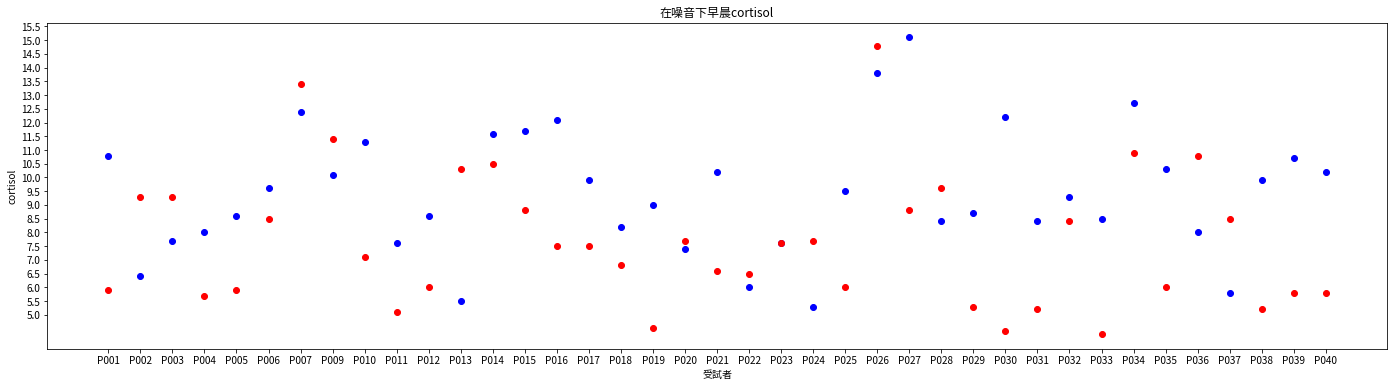

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'o_am_cortisol', 'x_am_cortisol']]
data = data.astype({'o_am_cortisol': 'single', 'x_am_cortisol': 'single'})

x = np.array(data['id'])
y1 = np.array(data['o_am_cortisol'])
y2 = np.array(data['x_am_cortisol'])

plt.figure(figsize=(24,6))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y1, c='blue')
plt.scatter(x, y2, c='red')
# 正常範圍為3.7至19.4之間

plt.yticks(np.arange(5, 16, 0.5))  
plt.ylabel("cortisol")
plt.xlabel("受試者")
plt.title("在噪音下早晨cortisol")
plt.show()

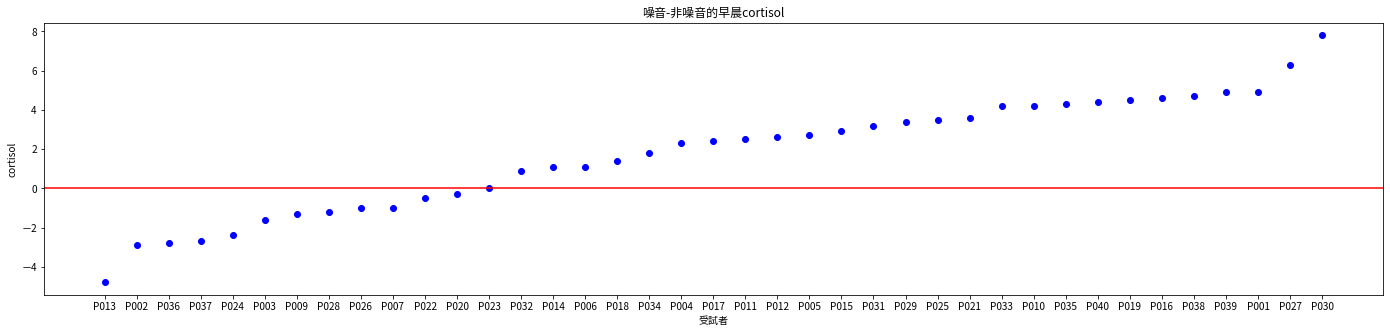

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'o_am_cortisol', 'x_am_cortisol']]
data = data.astype({'o_am_cortisol': 'single', 'x_am_cortisol': 'single'})
data['diff_am_cortisol'] = data['o_am_cortisol'] - data['x_am_cortisol']
data = data.sort_values('diff_am_cortisol')

x = np.array(data['id'])
y = np.array(data['diff_am_cortisol'])


plt.figure(figsize=(24,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y, c='blue')
plt.axhline(y=0, c='red')
# 正常範圍為3.7至19.4之間

# plt.yticks(np.arange(5, 16, 0.5))  
plt.ylabel("cortisol")
plt.xlabel("受試者")
plt.title("噪音-非噪音的早晨cortisol")
plt.show()

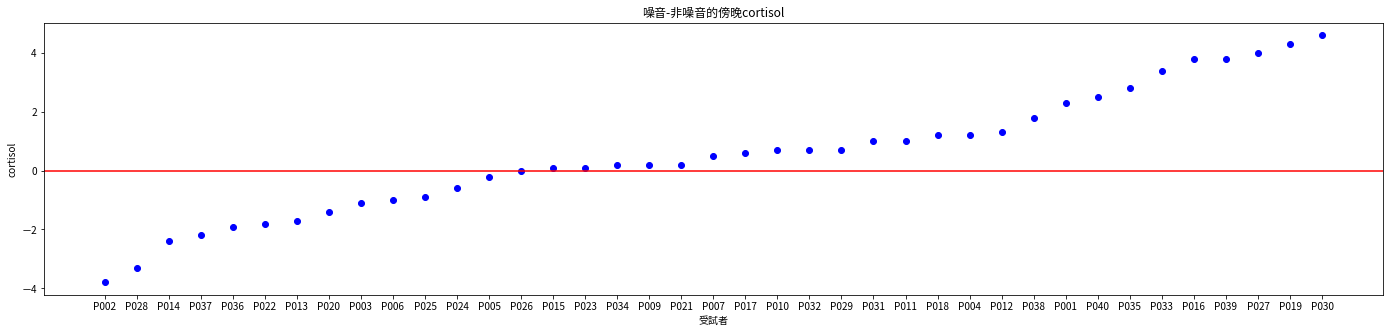

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'o_pm_cortisol', 'x_pm_cortisol']]
data = data.astype({'o_pm_cortisol': 'single', 'x_pm_cortisol': 'single'})
data['diff_pm_cortisol'] = data['o_pm_cortisol'] - data['x_pm_cortisol']
data = data.sort_values('diff_pm_cortisol')

x = np.array(data['id'])
y = np.array(data['diff_pm_cortisol'])


plt.figure(figsize=(24,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y, c='blue')
plt.axhline(y=0, c='red')
# 正常範圍為3.7至19.4之間

# plt.yticks(np.arange(5, 16, 0.5))  
plt.ylabel("cortisol")
plt.xlabel("受試者")
plt.title("噪音-非噪音的傍晚cortisol")
plt.show()

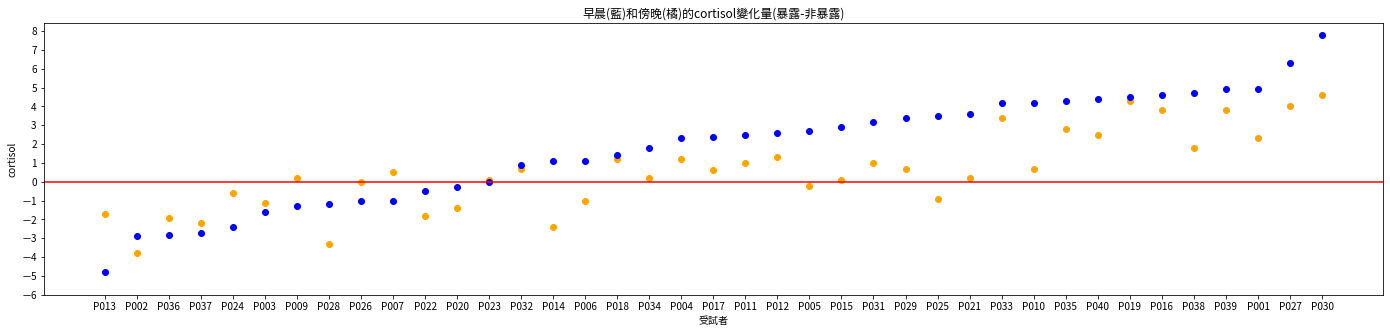

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'o_pm_cortisol', 'x_pm_cortisol', 'o_am_cortisol', 'x_am_cortisol']]
data = data.astype({'o_pm_cortisol': 'single', 'x_pm_cortisol': 'single', 'o_am_cortisol': 'single', 'x_am_cortisol': 'single'})
data['diff_pm_cortisol'] = data['o_pm_cortisol'] - data['x_pm_cortisol']
data['diff_am_cortisol'] = data['o_am_cortisol'] - data['x_am_cortisol']
data = data.sort_values('diff_am_cortisol')

x = np.array(data['id'])
y1 = np.array(data['diff_pm_cortisol'])
y2 = np.array(data['diff_am_cortisol'])


plt.figure(figsize=(24,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y1, c='orange')
plt.scatter(x, y2, c='blue')
plt.axhline(y=0, c='red')
# 正常範圍為3.7至19.4之間

plt.yticks(np.arange(-6, 8.5, 1))  
plt.ylabel("cortisol")
plt.xlabel("受試者")
plt.title("早晨(藍)和傍晚(橘)的cortisol變化量(暴露-非暴露)")
plt.show()

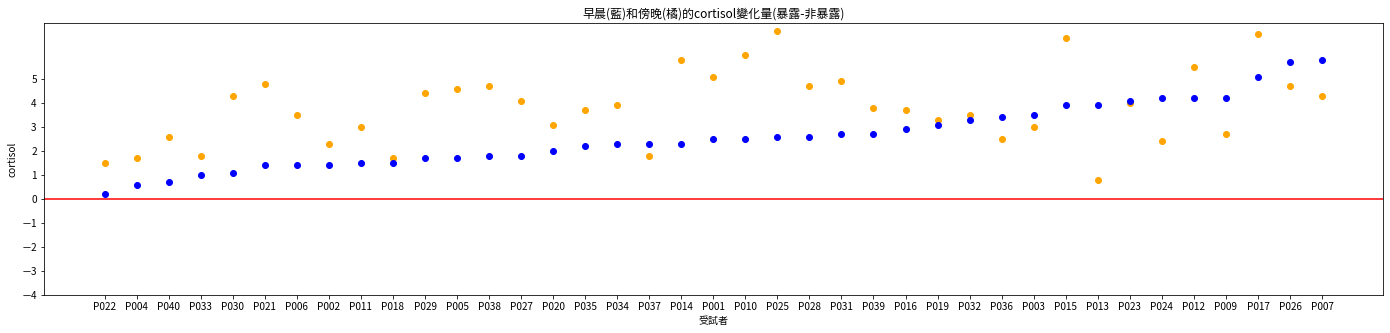

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'o_pm_cortisol', 'x_pm_cortisol', 'o_am_cortisol', 'x_am_cortisol']]
data = data.astype({'o_pm_cortisol': 'single', 'x_pm_cortisol': 'single', 'o_am_cortisol': 'single', 'x_am_cortisol': 'single'})
data['diff_o_cortisol'] = data['o_am_cortisol'] - data['o_pm_cortisol']
data['diff_x_cortisol'] = data['x_am_cortisol'] - data['x_pm_cortisol']
# data['delta_cortisol'] = data['diff_o_cortisol'] - data['diff_x_cortisol']
data = data.sort_values('diff_x_cortisol')

x = np.array(data['id'])
y = np.array(data['diff_o_cortisol'])
y2 = np.array(data['diff_x_cortisol'])


plt.figure(figsize=(24,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y, c='orange')
plt.scatter(x, y2, c='blue')
plt.axhline(y=0, c='red')
# 正常範圍為3.7至19.4之間

plt.yticks(np.arange(-4, 6, 1))  
plt.ylabel("cortisol")
plt.xlabel("受試者")
plt.title("早晨(藍)和傍晚(橘)的cortisol變化量(暴露-非暴露)")
plt.show()

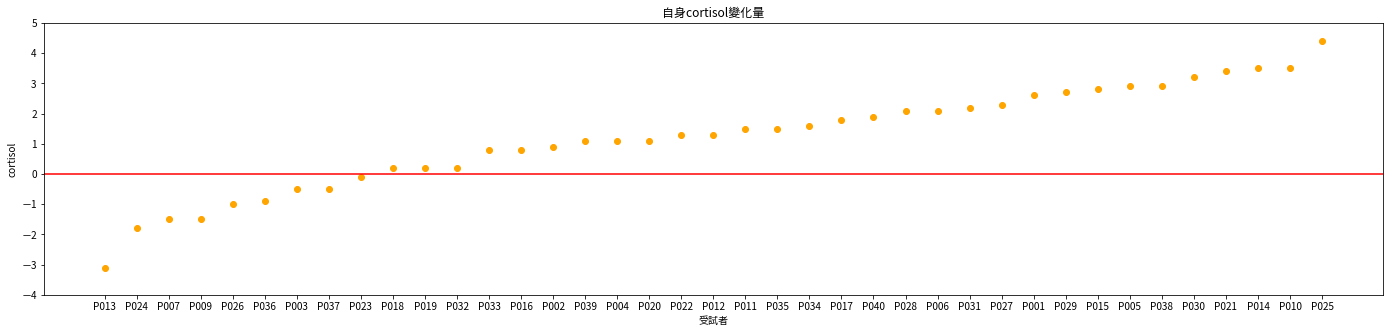

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'o_pm_cortisol', 'x_pm_cortisol', 'o_am_cortisol', 'x_am_cortisol']]
data = data.astype({'o_pm_cortisol': 'single', 'x_pm_cortisol': 'single', 'o_am_cortisol': 'single', 'x_am_cortisol': 'single'})
data['diff_o_cortisol'] = data['o_am_cortisol'] - data['o_pm_cortisol']
data['diff_x_cortisol'] = data['x_am_cortisol'] - data['x_pm_cortisol']
data['delta_cortisol'] = data['diff_o_cortisol'] - data['diff_x_cortisol']
data = data.sort_values('delta_cortisol')

x = np.array(data['id'])
y = np.array(data['delta_cortisol'])


plt.figure(figsize=(24,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y, c='orange')
plt.axhline(y=0, c='red')
# 正常範圍為3.7至19.4之間

plt.yticks(np.arange(-4, 6, 1))  
plt.ylabel("cortisol")
plt.xlabel("受試者")
plt.title("自身cortisol變化量")
plt.show()